## Data quality check / cleaning / preparation 


In [5]:
#| echo: false
import pandas as pd
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.offline as pyo
import plotly.express as px
pyo.init_notebook_mode(connected=True)

In [3]:
data = pd.read_csv('US_Accidents_March23.csv')

### Distribution of variables
*By Glorietta Arthoro*

Text(0.5, 1.0, 'Distribution of Severity Levels')

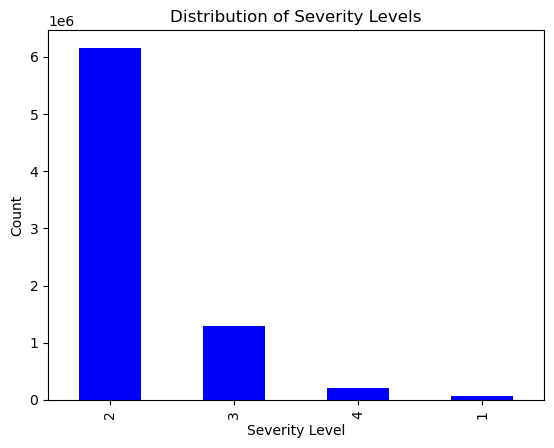

In [7]:
#| echo: false
severity_counts=data['Severity'].value_counts()
severity_counts.plot(kind='bar', color='blue')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Distribution of Severity Levels')

In [33]:
data['Severity'].describe()

count    7.728394e+06
mean     2.212384e+00
std      4.875313e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      4.000000e+00
Name: Severity, dtype: float64

The targeted variable severity shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic. The average severity level of the accidents is around 2.21 which makes sense as there are more severity level 2 accidents recorded then any other severity level, with accidents of sevrity level 1 being the least recorded level.

In [15]:
print('Missing Values of City:', data['City'].isnull().sum())
data['City'].describe()

Missing Values of City: 253


count     7728141
unique      13678
top         Miami
freq       186917
Name: City, dtype: object

In [16]:
print('Missing Values of State:', data['State'].isnull().sum())
data['State'].describe()

Missing Values of State: 0


count     7728394
unique         49
top            CA
freq      1741433
Name: State, dtype: object

In [17]:
print('Missing Values of Precipitation:',  data['Precipitation(in)'].isnull().sum())
data['Precipitation(in)'].describe()

Missing Values of Precipitation: 2203586


count    5.524808e+06
mean     8.407210e-03
std      1.102246e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.647000e+01
Name: Precipitation(in), dtype: float64

In [18]:
print('Missing Values of Start_Time:', data['Start_Time'].isnull().sum())
data['Start_Time'].describe()

Missing Values of Start_Time: 0


count                 7728394
unique                6131796
top       2021-01-26 16:16:13
freq                      225
Name: Start_Time, dtype: object

In [19]:
print('Missing Values of Sunrise_Sunset:', data['Sunrise_Sunset'].isnull().sum())
data['Sunrise_Sunset'].describe()

Missing Values of Sunrise_Sunset: 23246


count     7705148
unique          2
top           Day
freq      5334553
Name: Sunrise_Sunset, dtype: object

In [20]:
print('Missing Values of Amenity:', data['Amenity'].isnull().sum())
data['Amenity'].describe()

Missing Values of Amenity: 0


count     7728394
unique          2
top         False
freq      7632060
Name: Amenity, dtype: object

In [21]:
print('Missing Values of Bump:', data['Bump'].isnull().sum())
data['Bump'].describe()

Missing Values of Bump: 0


count     7728394
unique          2
top         False
freq      7724880
Name: Bump, dtype: object

In [22]:
print('Missing Values of Crossing:', data['Crossing'].isnull().sum())
data['Crossing'].describe()

Missing Values of Crossing: 0


count     7728394
unique          2
top         False
freq      6854631
Name: Crossing, dtype: object

In [23]:
print('Missing Values of Give_Way:', data['Give_Way'].isnull().sum())
data['Give_Way'].describe()

Missing Values of Give_Way: 0


count     7728394
unique          2
top         False
freq      7691812
Name: Give_Way, dtype: object

In [24]:
print('Missing Values of Junction:', data['Junction'].isnull().sum())
data['Junction'].describe()

Missing Values of Junction: 0


count     7728394
unique          2
top         False
freq      7157052
Name: Junction, dtype: object

In [25]:
print('Missing Values of No_Exit:', data['No_Exit'].isnull().sum())
data['No_Exit'].describe()

Missing Values of No_Exit: 0


count     7728394
unique          2
top         False
freq      7708849
Name: No_Exit, dtype: object

In [26]:
print('Missing Values of Railway:', data['Railway'].isnull().sum())
data['Railway'].describe()

Missing Values of Railway: 0


count     7728394
unique          2
top         False
freq      7661415
Name: Railway, dtype: object

In [27]:
print('Missing Values of Roundabout:', data['Roundabout'].isnull().sum())
data['Roundabout'].describe()

Missing Values of Roundabout: 0


count     7728394
unique          2
top         False
freq      7728145
Name: Roundabout, dtype: object

In [28]:
print('Missing Values of Station:', data['Station'].isnull().sum())
data['Station'].describe()

Missing Values of Station: 0


count     7728394
unique          2
top         False
freq      7526493
Name: Station, dtype: object

In [29]:
print('Missing Values of Stop:', data['Stop'].isnull().sum())
data['Stop'].describe()

Missing Values of Stop: 0


count     7728394
unique          2
top         False
freq      7514023
Name: Stop, dtype: object

In [30]:
print('Missing Values of Traffic_Calming:', data['Traffic_Calming'].isnull().sum())
data['Traffic_Calming'].describe()

Missing Values of Traffic_Calming: 0


count     7728394
unique          2
top         False
freq      7720796
Name: Traffic_Calming, dtype: object

In [31]:
print('Missing Values of Traffic_Signal:', data['Traffic_Signal'].isnull().sum())
data['Traffic_Signal'].describe()

Missing Values of Traffic_Signal: 0


count     7728394
unique          2
top         False
freq      6584622
Name: Traffic_Signal, dtype: object

In [32]:
print('Missing Values of Turning_Loop:', data['Turning_Loop'].isnull().sum())
data['Turning_Loop'].describe()

Missing Values of Turning_Loop: 0


count     7728394
unique          1
top         False
freq      7728394
Name: Turning_Loop, dtype: object

### Data cleaning
*By Vivian Chen & Max Milo*

In [34]:
# TO FILTER DATA FOR ANALYSIS 3
# reading data
data.head()
# subsetting data to only the Severity and Precipitation columns (necessary for Vivian's EDA)
weather_data = data.loc[:, ['Severity', 'Precipitation(in)']]
weather_data = pd.DataFrame(weather_data)
shape_of_data = weather_data.shape 
# drop missing values in subsequent columns
weather_data.dropna(subset = 'Precipitation(in)', inplace = True)
weather_data.value_counts('Precipitation(in)')
weather_data = weather_data.sort_values(by = 'Precipitation(in)', ascending = False)

In [57]:
#TO MODIFY AND VISUALIZE DATA FOR ANALYSIS 4
#SUBSETTING THE DATA TO INCLUDE ONLY COLUMNS USED - FOR FASTER RUN TIME
time_data = data.loc[:,['Severity', 'Start_Time', 'Sunrise_Sunset']]
#SUMS THE NA VALUES IN EACH COLUMN OF time_data
time_data.isnull().sum()
#DROPPING THE ROWS WITH NA VALUES OF Sunrise_Sunset
time_data.dropna(subset=['Sunrise_Sunset'], inplace=True)

### Data preparation
*By Karrah, Glorietta, and Max*


In [36]:
#ANALYSIS 1

# Creating Dataframes 
# group accidents dataframe by state and counting the occurences of each city within each state
total = data.groupby('State')['City'].count()
# calculate percentage of accidents relative to total number of accidents
percentage = total / data['City'].count() * 100
Severity = percentage.reset_index(name='Percentage')

# Filtering data with severity level 1 
severity1 = data[data['Severity'] == 1]
# Similar as above but with filtered data
severity_count1 = severity1.groupby('State')['City'].count()
percentage1 = severity_count1 / severity1['City'].count() * 100
Severity_1 = percentage1.reset_index(name='Percentage')

# Same steps as level 1 but with severity level 2
severity2 = data[data['Severity'] == 2]
severity_count2 = severity2.groupby('State')['City'].count()
percentage2 = severity_count2 / severity2['City'].count() * 100
Severity_2 = percentage2.reset_index(name='Percentage')

# Same steps as level 1 but with severity level 3
severity3 = data[data['Severity'] == 3]
severity_count3 = severity3.groupby('State')['City'].count()
percentage3 = severity_count3 / severity3['City'].count() * 100
Severity_3 = percentage3.reset_index(name='Percentage')

# Same steps as level 1 but with severity level 4
severity4 = data[data['Severity'] == 4]
severity_count4 = severity4.groupby('State')['City'].count()
percentage4 = severity_count4 / severity4['City'].count() * 100
Severity_4 = percentage4.reset_index(name='Percentage')

In [37]:
#ANALYSIS 2

#TO FIND HOW MANY ROAD FEATURES EACH ACCIDENT HAD NEARBY 
data['Total_Road_Features'] = data.iloc[:,29:41].sum(axis=1)


#FILTER ROAD FEATURES FOR VA AND PA
virginia_severity_4_data = data[(data['State'] == 'VA') & (data['Severity'] == 4)]
penn_severity_4_data = data[(data['State'] == 'PA') & (data['Severity'] == 4)]

In [58]:
#ANALYSIS 4
#MAKING COLUMNS FOR HOUR, DAY, MONTH, AND YEAR
time_data['Hour'] = pd.to_datetime(time_data['Start_Time']).dt.hour
time_data['Day'] = pd.to_datetime(time_data['Start_Time']).dt.day
time_data['Month'] = pd.to_datetime(time_data['Start_Time']).dt.month
time_data['Year'] = pd.to_datetime(time_data['Start_Time']).dt.year
#SORTING THE DATA BY MONTH, THEN DAY, THEN HOUR FOR FUTURE VISUALIZATION
time_data.sort_values(by=['Month', 'Day', 'Hour'], inplace=True)
#DROPPING THE ORIGINAL DATETIME COLUMN USED TO MAKE NEW COLUMNS
time_data.drop(['Start_Time'], axis=1, inplace=True)
#MAKING DATASETS FOR ACCIDENTS DURING THE DAY AND ACCIDENTS AT NIGHT
day_data = time_data[time_data.Sunrise_Sunset=='Day']
night_data = time_data[time_data.Sunrise_Sunset=='Night']
#MAKES A CROSSTAB OF Month AND Severity
sevcross = pd.crosstab(time_data['Month'], time_data['Severity'])
#MAKES A CROSSTAB OF Month AND Severity FOR THE ACCIDENTS DURING THE DAY
daysevcross = pd.crosstab(day_data['Month'], day_data['Severity'])
#MAKES A CROSSTAB OF Month AND Severity FOR THE ACCIDENTS AT NIGHT
nightsevcross = pd.crosstab(night_data['Month'], night_data['Severity'])
#MAKES A CROSSTAB OF Hour AND Severity
sevcrossh = pd.crosstab(time_data['Hour'], time_data['Severity'])

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Analysis 1
*By Karrah Toatley*

In [39]:
# CREATING CHOROPLATH MAP 
# Creating a choropleth map for the overall percentage of accidents by state
fig = px.choropleth(Severity,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale="emrld",)
fig.update_layout(
      title_text = 'Percentage of Accidents By State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,)

In [40]:
# Creating a choropleth map for the percentage of severity level 1 accidents by state
fig = px.choropleth(Severity_1,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale="emrld",)
fig.update_layout(
      title_text = 'Percentage of Severity Level 1 Accidents By State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,)

In [41]:
# Creating a choropleth map for the percentage of severity level 2 accidents by state
fig = px.choropleth(Severity_2,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale= "emrld",)
fig.update_layout(
      title_text = 'Percentage of Severity Level 2 Accidents By State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,)

In [42]:
# Creating a choropleth map for the percentage of severity level 3 accidents by state
fig = px.choropleth(Severity_3,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale="emrld",)
fig.update_layout(
      title_text = 'Percentage of Severity Level 3 Accidents By State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,)

In [43]:
# Creating a choropleth map for the percentage of severity level 4 accidents by state
fig = px.choropleth(Severity_4,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percentage',
                    color_continuous_scale="emrld",)
fig.update_layout(
      title_text = 'Percentage of Severity Level 4 Accidents By State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45,)

Text(0.5, 1.0, 'Average Severity Level by State')

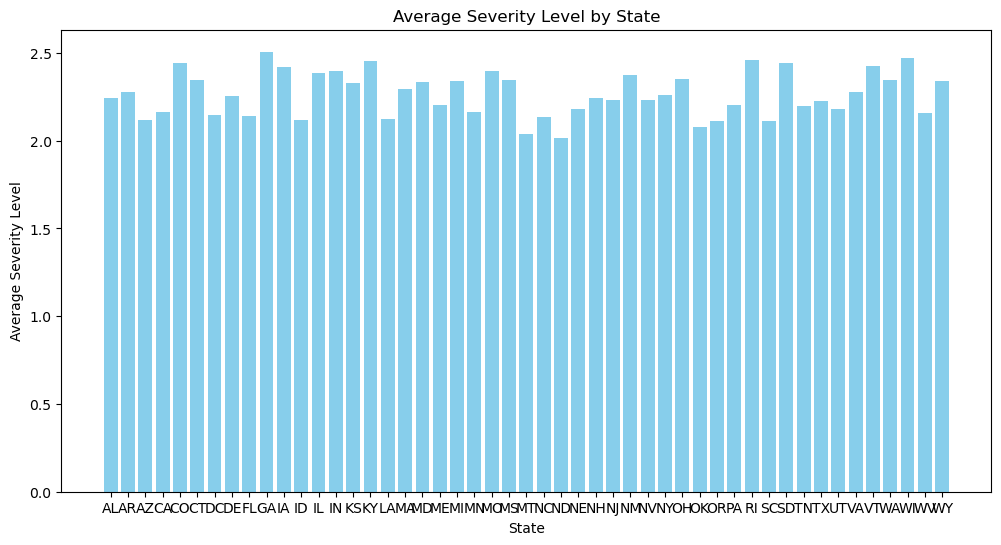

In [65]:
# CALCULATIING AVERAGE SEVERITY FOR EACH STATE
average_severity = data.groupby('State')['Severity'].mean().reset_index()
# CREATE BAR GRAPH 
# Creating a bar plot 
plt.figure(figsize=(12, 6))
plt.bar(average_severity['State'], average_severity['Severity'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Severity Level')
plt.title('Average Severity Level by State')

### Analysis 2
*By Glorietta Arthoro*

Text(0.5, 1.0, 'Distribution of Accidents by Total Road Features')

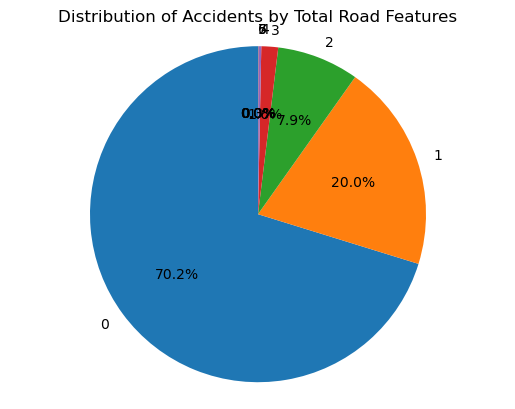

In [44]:
#DISTRIBUTION OF RANGE OF TOTAL ROAD FEATURES FOR ACCIDENTS
total_road_feature_counts =data['Total_Road_Features'].value_counts()
plt.pie(total_road_feature_counts, labels=total_road_feature_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Accidents by Total Road Features')

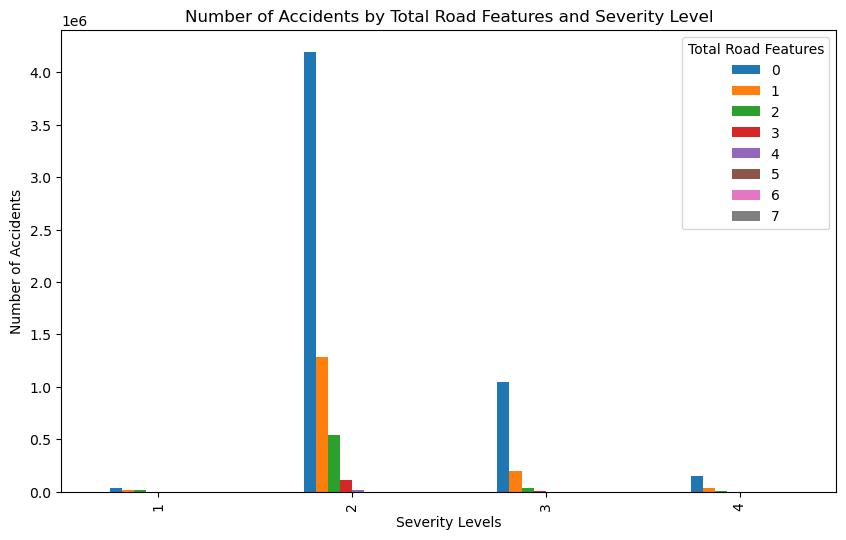

In [45]:
# GROUPING EACH TOTAL ROAD FEATURE COUNT BY SEVERITY LEVEL
severity_feature_counts = data.groupby(['Severity', 'Total_Road_Features']).size().reset_index(name='Count')
pivoted_data =severity_feature_counts.pivot(index='Severity', columns='Total_Road_Features', values='Count')

#CREATE A SIDE-BY-SIDE BAR PLOT TO SHOW RANGE OF ROAD FEATURES BY SEVERITY
ax = pivoted_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Severity Levels')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Total Road Features and Severity Level')
plt.legend(title='Total Road Features')

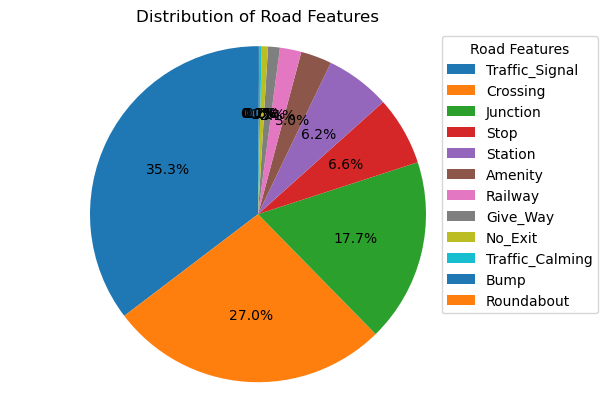

In [46]:
#COUNT TOTAL OF EACH ROAD FEATURE 
road_feature_columns = data.columns[29:41]
road_feature_counts = {}
for column in road_feature_columns:
    road_feature_counts[column] = data[column].sum()
feature_counts_df = pd.DataFrame(list(road_feature_counts.items()), columns=['Road_Feature', 'Count'])
sorted_feature_counts = feature_counts_df.sort_values(by='Count', ascending=False)

#PIE CHART OF DISTRIBUTION OF ROAD FEATURES IN DATASET
plt.pie(sorted_feature_counts['Count'], labels=None, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Road Features')
plt.legend(sorted_feature_counts['Road_Feature'], title='Road Features', loc='upper right', bbox_to_anchor=(1.2, 1))

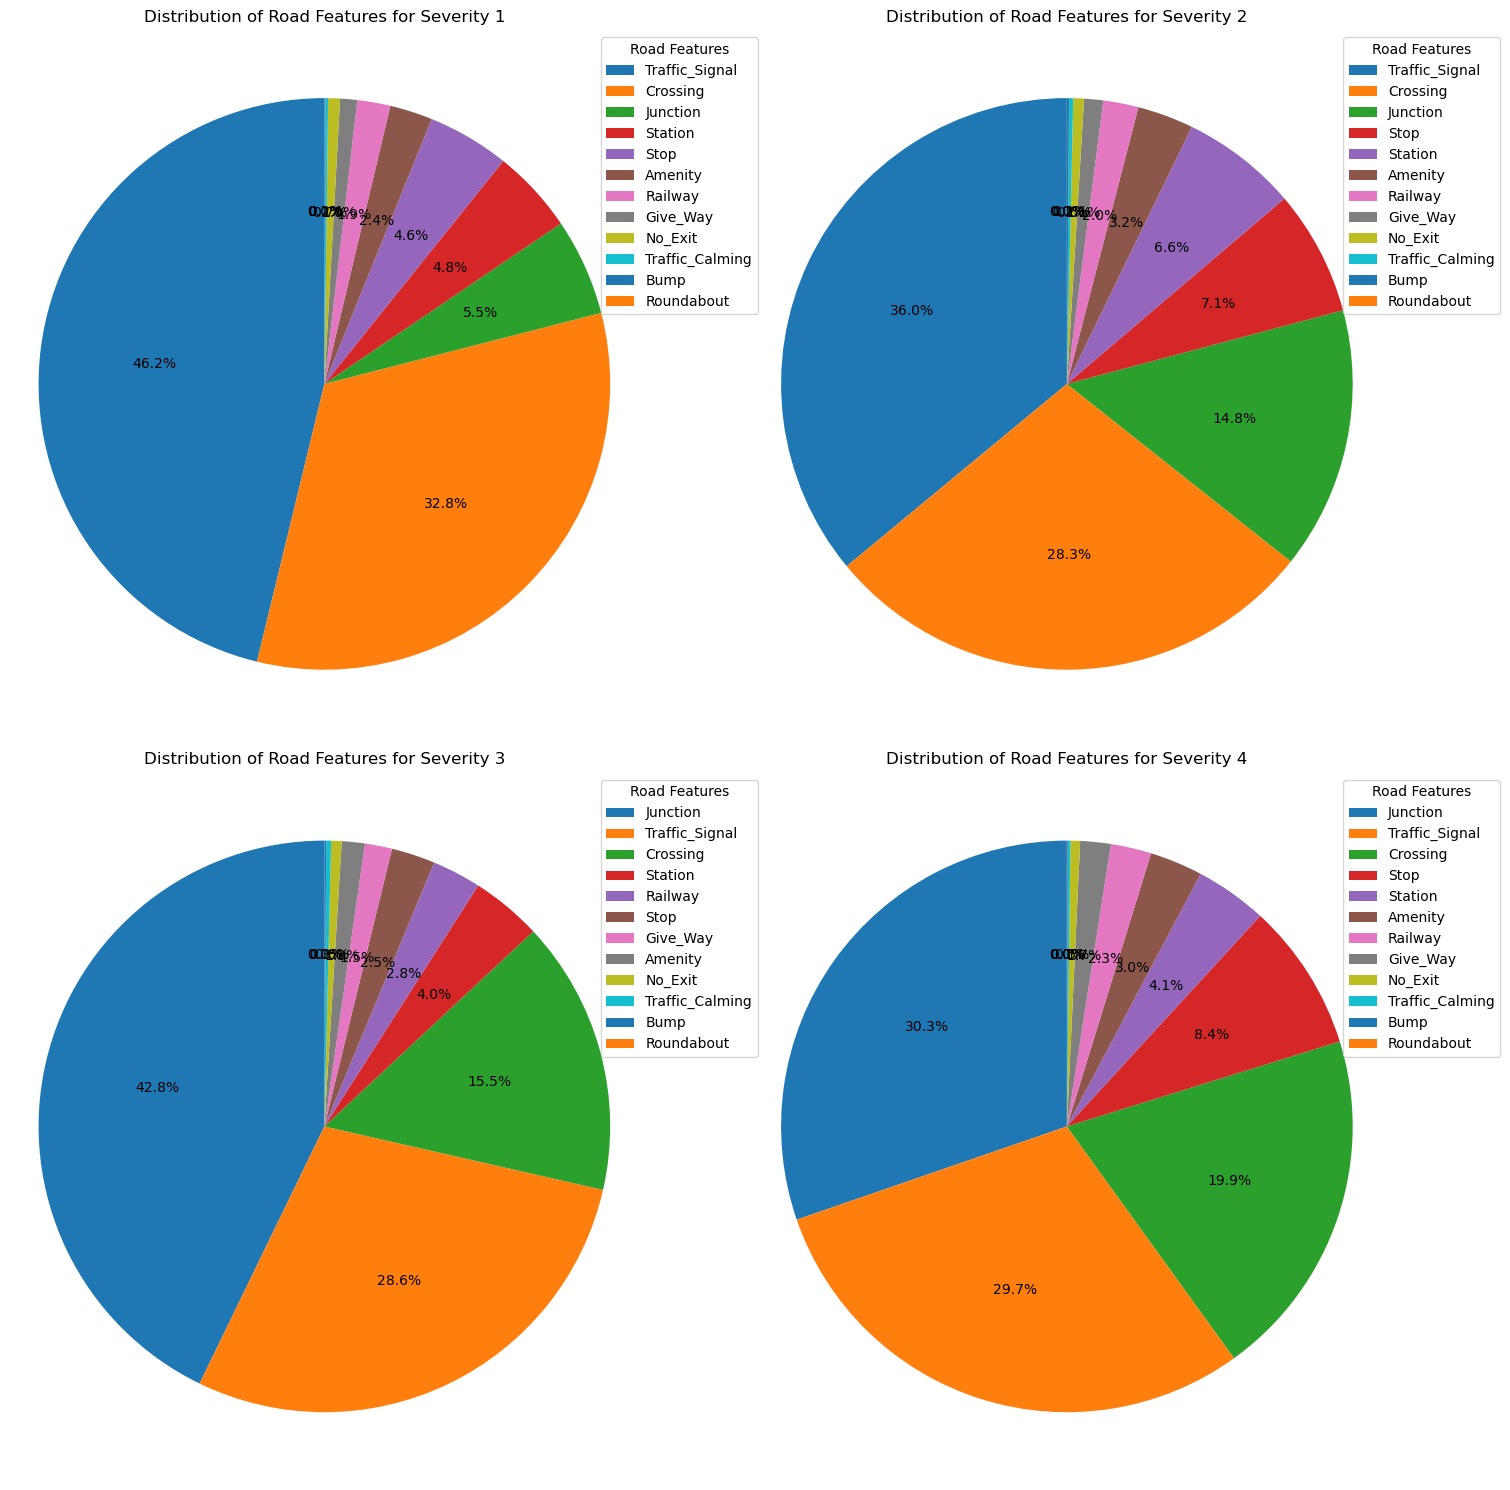

In [48]:
#CONVERT BOOLEANS
selected_columns = data.iloc[:, [2] + list(range(29, 41))].copy()
grouped_data = selected_columns.groupby('Severity').sum()
selected_columns.loc[:, selected_columns.columns[1:]] = selected_columns.loc[:, selected_columns.columns[1:]].astype(int)
#PIE CHARTS FOR DISTRIBUTION OF ROAD FEATURES FOR EACH SEVERITY LEVEL     
plt.figure(figsize=(15, 15))
for severity_level in grouped_data.index:
    road_features_counts = grouped_data.loc[severity_level].sort_values(ascending=False)
    plt.subplot(2, 2, severity_level) 
    plt.pie(road_features_counts, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribution of Road Features for Severity {severity_level}')
    plt.legend(road_features_counts.index, title='Road Features', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

In [49]:
#FINDING TOP 3 ROAD FEATURES IN VIRGINIA FOR SEVERITY 4
road_feature_columns = virginia_severity_4_data.columns[29:41]  
road_features_counts = virginia_severity_4_data[road_feature_columns].sum()
road_features_counts.nlargest(3)

Traffic_Signal    1251
Junction           761
Crossing           713
dtype: int64

In [50]:
#FINDING TOP 3 ROAD FEATURES IN PENNSYLVANIA FOR SEVERITY 4
road_feature_columns = penn_severity_4_data.columns[29:41]  
road_features_counts = penn_severity_4_data[road_feature_columns].sum()
road_features_counts.nlargest(3)

Traffic_Signal    2059
Junction          1749
Stop              1227
dtype: int64

### Analysis 3
*By Vivian Chen*

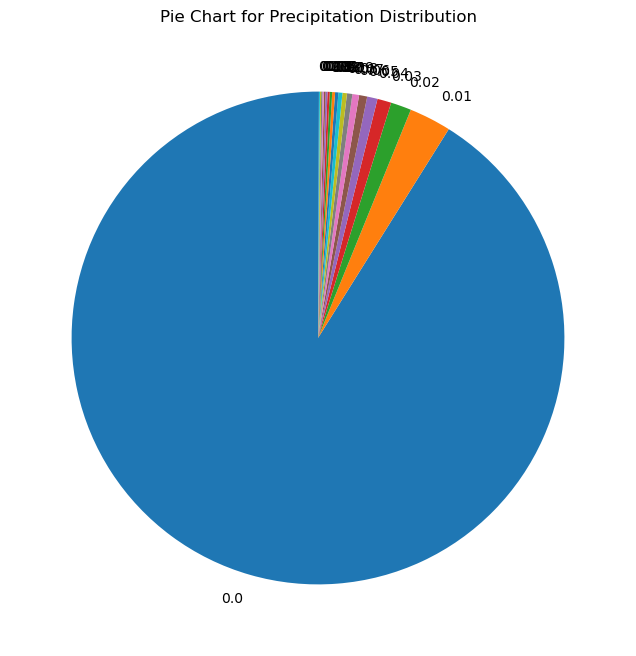

In [51]:
# TO CREATE PIE CHART
filtered_data = weather_data[weather_data['Precipitation(in)'] <= 0.2]

threshold = 10

# Count occurrences of each precipitation value
precipitation_counts = filtered_data['Precipitation(in)'].value_counts()

# Group small values into a category called 'Other'
precipitation_counts['Other'] = precipitation_counts[precipitation_counts < threshold].sum()
precipitation_counts = precipitation_counts[precipitation_counts >= threshold]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(precipitation_counts, labels=precipitation_counts.index, startangle=90)
ax.set_title('Pie Chart for Precipitation Distribution')

# Show the plot
plt.show()


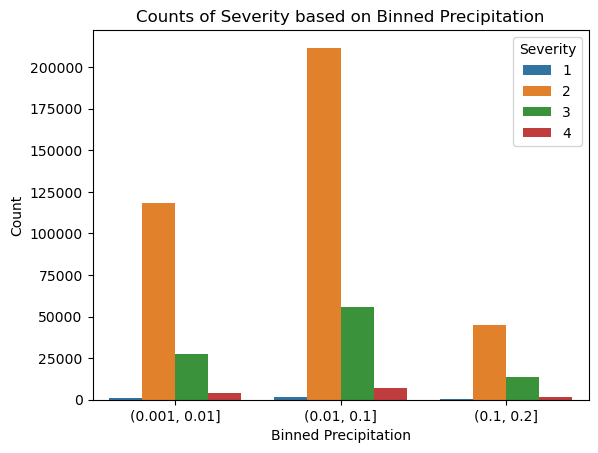

In [52]:
# TO CREATE BAR PLOT 
# custom bins
bin_edges = [0.001, 0.01, 0.1, 0.2]
filtered_data = data.copy()

# binning without using .loc
filtered_data['binned_precipitation'] = pd.cut(filtered_data['Precipitation(in)'], bins=bin_edges)

# count plot
ax = sns.countplot(x="binned_precipitation", hue='Severity', data=filtered_data)
ax.set_xlabel('Binned Precipitation')
ax.set_ylabel('Count')
ax.set_title('Counts of Severity based on Binned Precipitation')

plt.show()


### Analysis 4
*By Max Milo*

Text(0.5, 1.0, 'Total Number of Crashes Per Month by Severity')

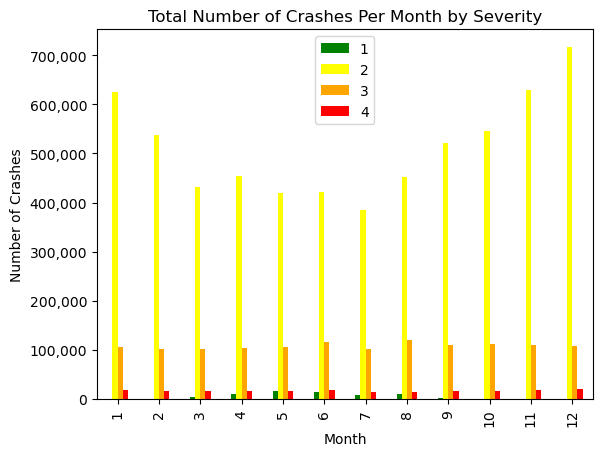

In [60]:
#UNSTACKED BARPLOT OF NUMBER OF CRASHES PER Month BY Severity
scrs = sevcross.plot.bar(ylabel = 'Number of Crashes', xlabel = 'Month', color=('green', 'yellow', 'orange', 'red'))
scrs.tick_params(axis = 'both',labelsize=10)
scrs.yaxis.set_major_formatter('{x:,.0f}')
scrs.legend(loc='best')
plt.title('Total Number of Crashes Per Month by Severity')

Text(0.5, 1.0, 'Total Number of Crashes Per Month by Severity (Day)')

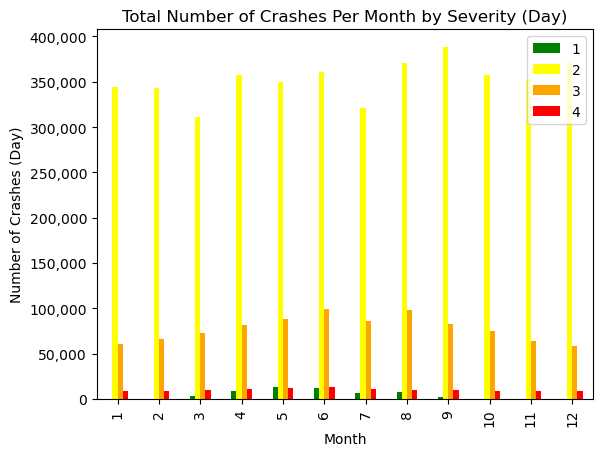

In [61]:
#UNSTACKED BARPLOT OF NUMBER OF CRASHES PER Month BY Severity FOR THE ACCIDENTS DURING THE DAY
dayscrs = daysevcross.plot.bar(ylabel = 'Number of Crashes (Day)', xlabel = 'Month', color=('green', 'yellow', 'orange', 'red'))
dayscrs.tick_params(axis = 'both',labelsize=10)
dayscrs.yaxis.set_major_formatter('{x:,.0f}')
dayscrs.legend(loc='best')
plt.title('Total Number of Crashes Per Month by Severity (Day)')

Text(0.5, 1.0, 'Total Number of Crashes Per Month by Severity (Night)')

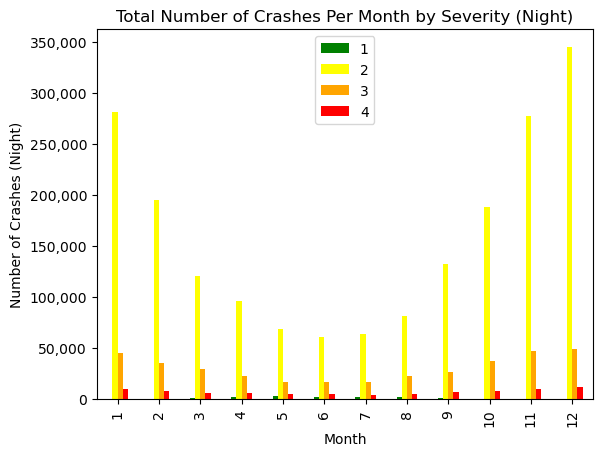

In [62]:
#UNSTACKED BARPLOT OF NUMBER OF CRASHES PER Month BY Severity FOR THE ACCIDENTS DURING THE DAY
nightscrs = nightsevcross.plot.bar(ylabel = 'Number of Crashes (Night)', xlabel = 'Month', color=('green', 'yellow', 'orange', 'red'))
nightscrs.tick_params(axis = 'both',labelsize=10)
nightscrs.yaxis.set_major_formatter('{x:,.0f}')
nightscrs.legend(loc='best')
plt.title('Total Number of Crashes Per Month by Severity (Night)')

Text(0.5, 1.0, 'Total Number of Crashes Per Hour by Severity')

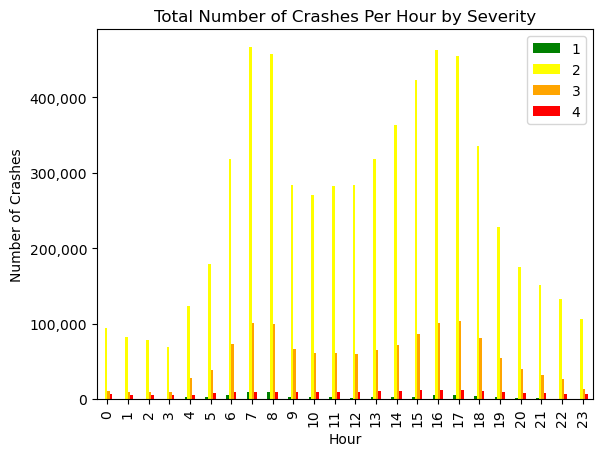

In [63]:
#UNSTACKED BARPLOT OF NUMBER OF CRASHES PER Hour BY Severity
scrsh = sevcrossh.plot.bar(ylabel = 'Number of Crashes', xlabel = 'Hour', color=('green', 'yellow', 'orange', 'red'))
scrsh.tick_params(axis = 'both',labelsize=10)
scrsh.yaxis.set_major_formatter('{x:,.0f}')
scrsh.legend(loc='best')
plt.title('Total Number of Crashes Per Hour by Severity')

Text(0.5, 1.0, 'Average Crash Severity by Date')

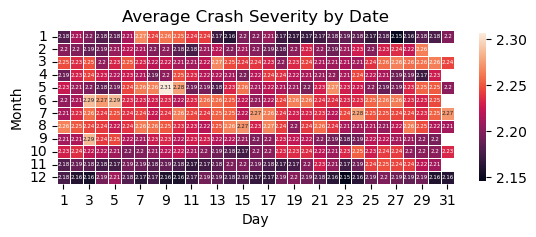

In [64]:
#HEATMAP OF AVERAGE Severity BY DATE: Month AND Day
avheatdata = time_data.groupby(['Month','Day'])['Severity'].aggregate('mean').unstack()
avheat = sns.heatmap(avheatdata, square=True, annot=True, annot_kws={'size': 4}, cbar_kws={"shrink": 0.4}, linewidths=.5, fmt='.3g')
plt.title('Average Crash Severity by Date')